In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_bpine_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Pinene
0,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.016667
1,9,0.263696,0.018027,-0.040742,-0.177703,0.057154,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.016667
2,12,0.301049,-0.056156,-0.030174,-0.036708,0.015147,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.016667
3,13,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.016667
4,17,0.291811,-0.052708,-0.061330,-0.034479,-0.010258,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
29996,42968,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
29997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333
29998,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003333


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Beta-Pinene'], axis = 1)
y = df_rf[['X..Beta-Pinene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.01666667],
       [0.01666667],
       [0.01666667],
       ...,
       [0.00333333],
       [0.00333333],
       [0.00333333]])

<Axes: ylabel='Count'>

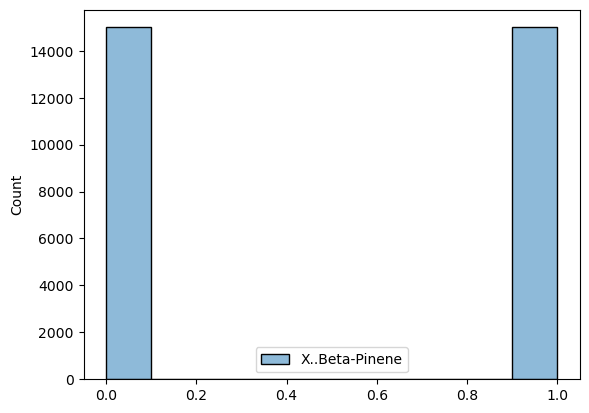

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1952/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.019847738614060258

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.006983403057647621

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08356675808985066

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.991346043829098

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9716610060518022

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.050565
1,lsa_1,0.044179
2,lsa_2,0.049305
3,lsa_3,0.049351
4,lsa_4,0.048889
...,...,...
81,tree,0.000555
82,tropical,0.001306
83,vanilla,0.004552
84,violet,0.000144


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
6,indica,5.908516e-01
0,lsa_0,5.056545e-02
3,lsa_3,4.935084e-02
2,lsa_2,4.930505e-02
4,lsa_4,4.888885e-02
1,lsa_1,4.417862e-02
43,blueberry,4.334929e-02
16,dry mouth,5.004612e-03
41,berry,4.947818e-03
54,grape,4.604650e-03


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([5.04044893e-02, 4.44092957e-02, 4.77287459e-02, 5.08036985e-02,
       4.91009489e-02, 7.51624133e-07, 5.91479324e-01, 1.42885422e-07,
       9.31525975e-05, 1.88581388e-03, 1.68541163e-03, 1.02595303e-10,
       2.93800996e-03, 6.97306316e-05, 2.16235644e-03, 2.83243959e-03,
       4.78348719e-03, 2.01220246e-03, 5.04150183e-10, 3.54261923e-03,
       4.47497336e-10, 3.97646156e-12, 3.11277502e-03, 1.85909429e-03,
       3.00322529e-03, 3.25259887e-03, 4.12149760e-03, 4.54285308e-05,
       6.27011379e-10, 1.53175327e-03, 3.38176932e-03, 2.36947646e-10,
       2.92020516e-03, 0.00000000e+00, 0.00000000e+00, 2.67793307e-03,
       3.62428382e-03, 3.24202914e-03, 2.29047926e-06, 2.28361220e-03,
       8.55947475e-05, 4.86047882e-03, 6.13590993e-06, 4.31678425e-02,
       3.31369051e-04, 2.27654443e-04, 8.14573715e-04, 1.10406220e-04,
       1.67563562e-03, 1.90934124e-03, 3.50091169e-03, 2.50487266e-03,
       2.60757488e-03, 4.13850207e-04, 4.78551710e-03, 3.25680642e-05,
      

In [23]:
selector.threshold_

0.011627906976744184

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,blueberry
0,0.261225,0.100324,-0.043622,0.141860,-0.034786,0,0
1,0.263696,0.018027,-0.040742,-0.177703,0.057154,0,0
2,0.301049,-0.056156,-0.030174,-0.036708,0.015147,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,0,0
4,0.291811,-0.052708,-0.061330,-0.034479,-0.010258,0,0
...,...,...,...,...,...,...,...
29995,0.360708,-0.269375,0.169135,0.099257,0.141142,1,0
29996,0.107417,-0.105614,-0.117669,-0.047306,0.055133,1,0
29997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,1,0
29998,0.181714,-0.045560,-0.055692,0.015649,-0.045585,1,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_bpine.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_bpine.pkl")

['selected_X_rf_lsa_elbow_bpine.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1952/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02227464853664983

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.00802751556784699

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08959640376626168

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9827190976284572

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9674225184237573

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_bpine.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_bpine.pkl")

['rscv_rf_lsa_elbow_best_params_bpine.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 5, max_features = 'auto', min_samples_leaf = 1, max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1952/2899369685.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02242086541907189

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.00804552099307085

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08969682822191011

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9826946792465797

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9673494483183747

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_bpine.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_bpine.pkl")

['y_test_rfreg_lsa_elbow_bpine.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.023999584717752848

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.008474602663287346

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.09205760513552015

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.965598252029271

Error analysis

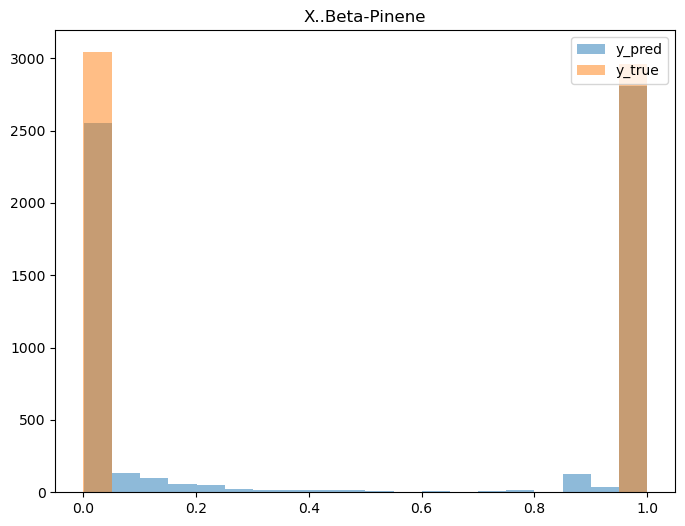

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Pinene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_bpine.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.983
P-value: 0.000


<Axes: >

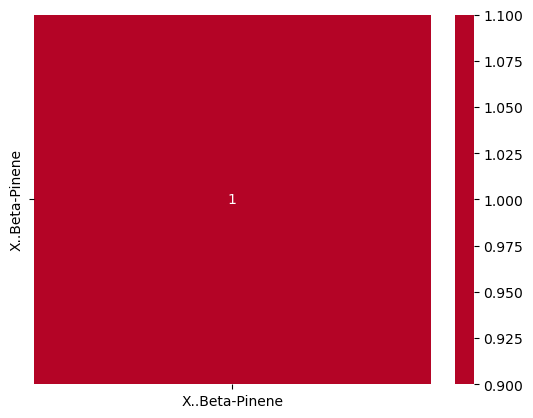

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)